# Facebook Method 1

In [6]:
import facebook
import requests
import pandas as pd

In [7]:
token="EAACEdEose0cBAOZAbUFhZBw0CxhcT3eZAKBPlw2qX15UpYwlHKSdhUm6YQ0vYjUV18dQ7PbkETJzmXuhKtetmyHfi7t6rpVs1Qp1xUEfhR1DvkRoWKkEXWHh5ZClJJ00ejw6d4iNrLAEnto3IcsvShJktLpLkGSksVvaSHGxHZClCn70MhV29"

In [8]:
page="TheNewsMinute"
url="https://graph.facebook.com/{}/posts?fields=created_time,message,likes.limit(0).summary(1),comments.limit(0).summary(1)&access_token={}".format(page,token)
print url

https://graph.facebook.com/TheNewsMinute/posts?fields=created_time,message,likes.limit(0).summary(1),comments.limit(0).summary(1)&access_token=EAACEdEose0cBAOZAbUFhZBw0CxhcT3eZAKBPlw2qX15UpYwlHKSdhUm6YQ0vYjUV18dQ7PbkETJzmXuhKtetmyHfi7t6rpVs1Qp1xUEfhR1DvkRoWKkEXWHh5ZClJJ00ejw6d4iNrLAEnto3IcsvShJktLpLkGSksVvaSHGxHZClCn70MhV29


In [9]:
data=requests.get(url).json()

### Get 4000 posts with required fields, Typecast required fields 

In [10]:
numposts=4000
next_url=None
l = list()
a=True
while a:
    if next_url==None:
        data=requests.get(url).json()
    else:
        data=requests.get(next_url).json()
    for dat in data['data']:
        try:
            postid=dat['id']
            text=str(dat['message'])
            posttime=dat['created_time']
            numlikes=dat['likes']['summary']['total_count']
            numcomments=dat['comments']['summary']['total_count']
            d = {"Post_ID": postid, "Post": text, "Time_of_posting": posttime, "Likes": numlikes, "Comments": numcomments}
        except:
            continue
        l.append(d)
        #print "Post ID: {}, Text: {}, Time of posting: {}, Likes:{} , Comments:{} \n".format(postid,text,posttime,numlikes,numcomments)
    fb=pd.DataFrame(data=l,columns=["Post_ID", "Post", "Time_of_posting", "Likes", "Comments"])
    if len(fb.index)>numposts:
        a=False
    try:
        next_url=data['paging']['next']
    except:
        break

for col in fb:
    if col=="Likes" or col=="Comments":
        fb[col] = fb[col].astype(int)
    elif col=="Created_at":
        fb[col] = pd.to_datetime(fb[col])
fb

,Post_ID,Post,Time_of_posting,Likes,Comments
0,1375307999395597_1825409591052100,"Protests, however, continue to not be permitte...",2017-02-04T17:45:00+0000,10,0
1,1375307999395597_1825209121072147,"The university claimed that it was a ""peaceful...",2017-02-04T17:00:04+0000,22,0
2,1375307999395597_1825335757726150,"The suspect, Madhukar Reddy was taken in for q...",2017-02-04T16:50:00+0000,16,2
3,1375307999395597_1825334564392936,"Considering Krishna's vast experience, the onl...",2017-02-04T16:40:00+0000,34,1
4,1375307999395597_1825192464407146,"For decades, the combined state of Andhra, pro...",2017-02-04T16:30:01+0000,8,0
5,1375307999395597_1825310891061970,"A year has gone by, with him no more.",2017-02-04T16:20:00+0000,14,1
6,1375307999395597_1825310664395326,Now only time will tell whether the latest twi...,2017-02-04T16:10:01+0000,7,0
7,1375307999395597_1825192917740434,An official announcement is expected by the en...,2017-02-04T16:00:04+0000,9,1
8,1375307999395597_1825206377739088,"Today, Indian art is no longer emerging within...",2017-02-04T15:50:01+0000,6,0
9,1375307999395597_1825310257728700,Hundreds of people came to bless the couple on...,2017-02-04T15:40:01+0000,55,2


### Create sqlite 

In [12]:
import sqlalchemy
engine = sqlalchemy.create_engine('sqlite:///' + "fb_sql.sqlite", echo=False)
fb.to_sql(name='fb_sql', con=engine, if_exists = 'replace', index=False)

In [13]:
#To check SQLITE
fbrd = pd.read_sql('fb_sql', engine)
fbrd

,Post_ID,Post,Time_of_posting,Likes,Comments
0,1375307999395597_1825409591052100,"Protests, however, continue to not be permitte...",2017-02-04T17:45:00+0000,10,0
1,1375307999395597_1825209121072147,"The university claimed that it was a ""peaceful...",2017-02-04T17:00:04+0000,22,0
2,1375307999395597_1825335757726150,"The suspect, Madhukar Reddy was taken in for q...",2017-02-04T16:50:00+0000,16,2
3,1375307999395597_1825334564392936,"Considering Krishna's vast experience, the onl...",2017-02-04T16:40:00+0000,34,1
4,1375307999395597_1825192464407146,"For decades, the combined state of Andhra, pro...",2017-02-04T16:30:01+0000,8,0
5,1375307999395597_1825310891061970,"A year has gone by, with him no more.",2017-02-04T16:20:00+0000,14,1
6,1375307999395597_1825310664395326,Now only time will tell whether the latest twi...,2017-02-04T16:10:01+0000,7,0
7,1375307999395597_1825192917740434,An official announcement is expected by the en...,2017-02-04T16:00:04+0000,9,1
8,1375307999395597_1825206377739088,"Today, Indian art is no longer emerging within...",2017-02-04T15:50:01+0000,6,0
9,1375307999395597_1825310257728700,Hundreds of people came to bless the couple on...,2017-02-04T15:40:01+0000,55,2


In [9]:
fb = fbrd.copy()

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline


## Most liked 

In [20]:
most_liked = fb.sort_values(by='Likes',ascending=False).head(10)

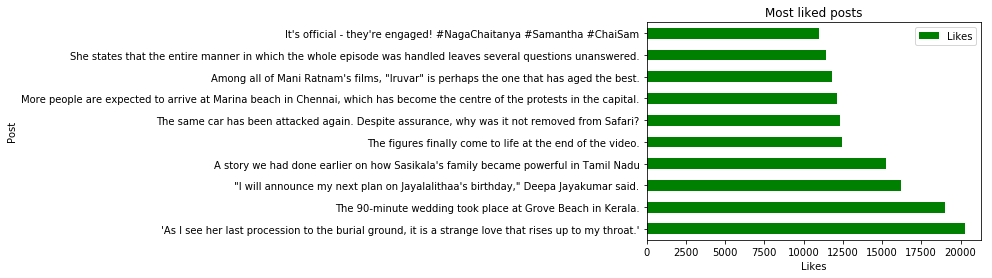

In [58]:
most_liked.plot.barh(y="Likes", x="Post",color='g')
plt.xlabel('Likes')
plt.title("Most liked posts")

## Most commented

In [39]:
most_commented=fb.sort_values(by='Comments',ascending=False).head(10)

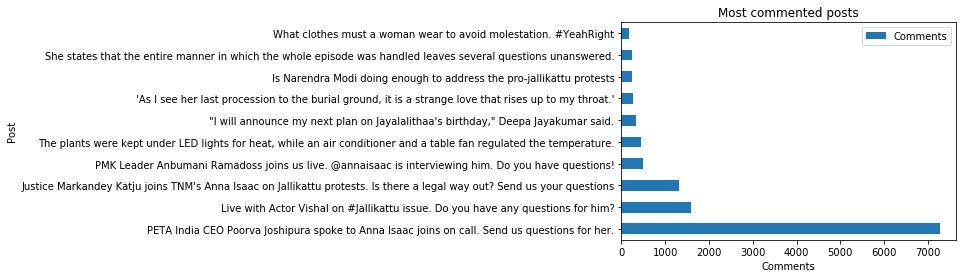

In [59]:
most_commented.plot.barh(y="Comments", x="Post")
plt.xlabel('Comments')
plt.title("Most commented posts")

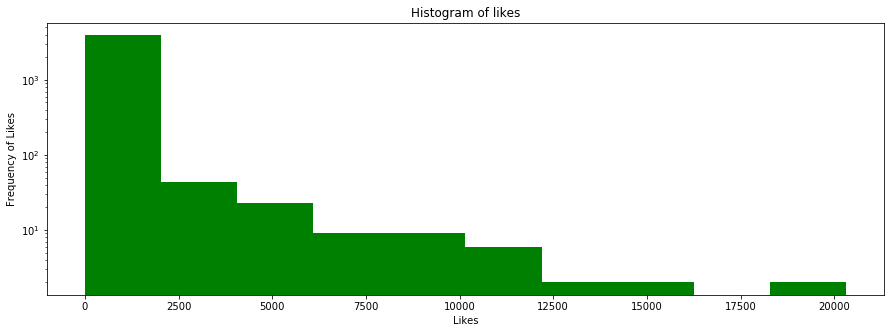

In [60]:
fb.ix[:,'Likes'].plot.hist(bins=10, figsize=(15,5), log=True, color='g')
plt.xlabel('Likes')
plt.ylabel('Frequency of Likes')
plt.title("Histogram of likes")

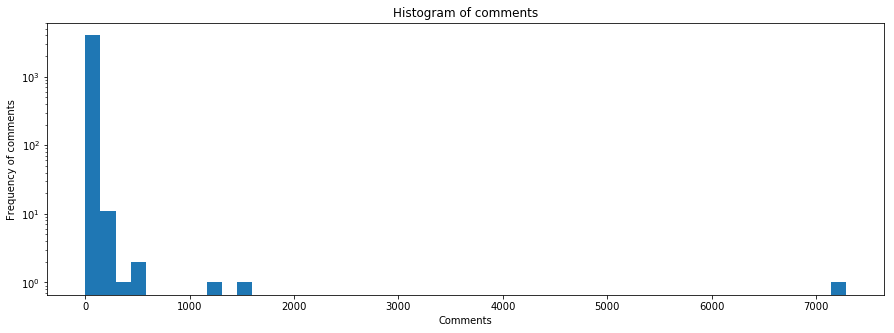

In [61]:
fb.ix[:,'Comments'].plot.hist(bins=50, figsize=(15,5), log=True)
plt.xlabel('Comments')
plt.ylabel('Frequency of comments')
plt.title("Histogram of comments")

In [42]:
fb_grp = fb.copy()
fb_grp.head()

,Post_ID,Post,Time_of_posting,Likes,Comments
0,1375307999395597_1825409591052100,"Protests, however, continue to not be permitte...",2017-02-04T17:45:00+0000,10,0
1,1375307999395597_1825209121072147,"The university claimed that it was a ""peaceful...",2017-02-04T17:00:04+0000,22,0
2,1375307999395597_1825335757726150,"The suspect, Madhukar Reddy was taken in for q...",2017-02-04T16:50:00+0000,16,2
3,1375307999395597_1825334564392936,"Considering Krishna's vast experience, the onl...",2017-02-04T16:40:00+0000,34,1
4,1375307999395597_1825192464407146,"For decades, the combined state of Andhra, pro...",2017-02-04T16:30:01+0000,8,0


## Post length

In [43]:
fb_grp['post_len']=0

for i in range(len(fb_grp)):
    fb_grp.ix[i,"post_len"] = len(fb_grp.ix[i,"Post"])

fb_grp.tail(10)

,Post_ID,Post,Time_of_posting,Likes,Comments,post_len
4006,1375307999395597_1795209134072146,"Jayalalithaa, the actor: Her intelligence and ...",2016-12-06T18:15:00+0000,110,0,91
4007,1375307999395597_1794567537469639,Trump will likely to be only too eager to borr...,2016-12-06T18:00:00+0000,17,0,73
4008,1375307999395597_1794563287470064,The objective for the demonetisation exercise ...,2016-12-06T17:50:00+0000,89,7,103
4009,1375307999395597_1794843104108749,If her persona made her an easy success in fil...,2016-12-06T17:00:00+0000,299,0,99
4010,1375307999395597_1795194770740249,"One thing that stood out most, was that she wa...",2016-12-06T16:30:00+0000,220,1,88
4011,1375307999395597_1795203390739387,He will always cherish the memory of the smile.,2016-12-06T16:15:01+0000,136,1,47
4012,1375307999395597_1795164734076586,Thousands came from far and wide to bid farewe...,2016-12-06T16:00:02+0000,135,0,71
4013,1375307999395597_1795197587406634,No other state has a transplant programme dire...,2016-12-06T15:45:00+0000,290,1,154
4014,1375307999395597_1795189077407485,"At the public vigil for MGR at Rajaji Hall, Ja...",2016-12-06T15:30:00+0000,104,0,117
4015,1375307999395597_1795197854073274,Jayalalithaa believed that the film industry w...,2016-12-06T15:15:00+0000,145,0,117


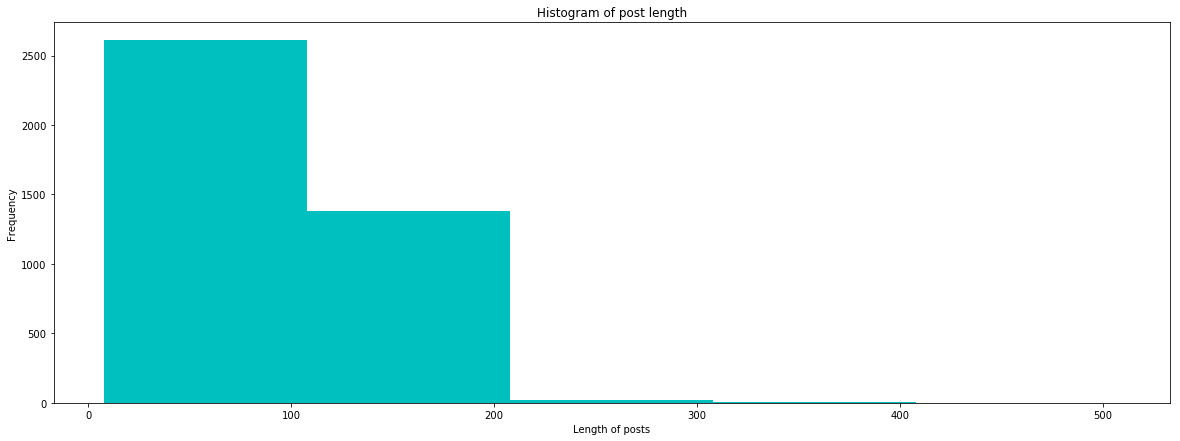

In [62]:
fb_grp['post_len'].plot.hist(bins=5, figsize=(20,7), color='c')
plt.xlabel('Length of posts')
plt.ylabel('Frequency')
plt.title("Histogram of post length")

## Popularity of posts with respect to post length

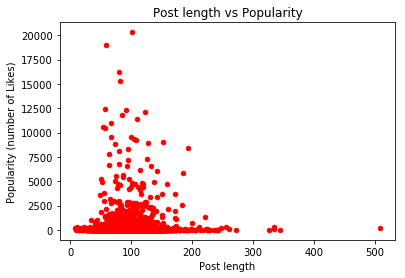

In [65]:
fb_grp.ix[:,['Likes','post_len']].plot.scatter('post_len','Likes', color='r')
plt.xlabel('Post length')
plt.ylabel('Popularity (number of Likes)')
plt.title("Post length vs Popularity")

# Facebook Method 2 

In [1]:
import facebook
import pandas as pd
token="EAACEdEose0cBABBi1TkVPvJnHncwGl7x6cLiPDkA4aw1VrWxci5BjHrZBLSoZCLfTl8DW6obzxKTTwMsXH1AcewLfeXAu1SDeYJbwtbZARMy6hrEFKxlHHIQPRwcdLR3vZC7ydyA85HEyyG2IcBFAtZA0j9G4T2moDEoo8DHNjA9glrsGqJ80VMoxg0T0kKwZD"
page="TheNewsMinute"

In [32]:
g= facebook.GraphAPI(token,version='2.7')
posts=dict()
print len(posts)
posts.update(g.get_connections(page,'posts',limit=10))
#while len(posts['data']) in (0,15):
s=0
while s<1:
    posts.update(g.get_connections(posts['paging']['next'],'posts',limit=5))
    if 'error' in posts.keys():
        raise Exception(posts)
    s+=1
print posts
print len(posts['data'])

0
{u'og_object': {u'type': u'website', u'id': u'1186636611457400', u'updated_time': u'2017-02-01T18:47:13+0000'}, u'paging': {u'next': u'https://graph.facebook.com/v2.7/1375307999395597/posts?limit=10&access_token=EAACEdEose0cBABBi1TkVPvJnHncwGl7x6cLiPDkA4aw1VrWxci5BjHrZBLSoZCLfTl8DW6obzxKTTwMsXH1AcewLfeXAu1SDeYJbwtbZARMy6hrEFKxlHHIQPRwcdLR3vZC7ydyA85HEyyG2IcBFAtZA0j9G4T2moDEoo8DHNjA9glrsGqJ80VMoxg0T0kKwZD&until=1485964801&__paging_token=enc_AdBMhY4raDZC6X8ndCZCh2RYTAk8euOtqHIs8kG7zwNHWOVbyDOsq5P4wI0cuc5chsZBXZCLuHrqwr3x3evSqiHMHfW8LJYbyGm6W64GR0VPqEk4nwZDZD', u'previous': u'https://graph.facebook.com/v2.7/1375307999395597/posts?limit=10&since=1485972901&access_token=EAACEdEose0cBABBi1TkVPvJnHncwGl7x6cLiPDkA4aw1VrWxci5BjHrZBLSoZCLfTl8DW6obzxKTTwMsXH1AcewLfeXAu1SDeYJbwtbZARMy6hrEFKxlHHIQPRwcdLR3vZC7ydyA85HEyyG2IcBFAtZA0j9G4T2moDEoo8DHNjA9glrsGqJ80VMoxg0T0kKwZD&__paging_token=enc_AdCm3uEOxnNYYDkRGZBLKLxyUE2Rsm8hu7B9NJR7QZCWMq0njGyWnyl0awes4aCCdtrLZBawtkXAP0A0SvI2XhARKQOZAbsOqbqu6BAwptEaT

In [10]:
fb2=pd.DataFrame(columns=["ID", "Text", "Created_at", "Likes", "Comments"])
for col in fb2:
    if col=="Likes" or col=="Comments":
        fb2[col] = fb2[col].astype(int)
    elif col=="Created_at":
        fb2[col] = pd.to_datetime(fb2[col]) 

for post in posts['data']:
    #print post.keys()
    pid = post['id']
    #print pid
    try:
        text=post['message']
    except KeyError:
        print "No message for Post ID: {}".format(pid)
        continue
    time = post['created_time']
    likes=g.get_connections(pid,'likes',limit=0,summary=True)
    num_likes=likes['summary']['total_count']
    
    comments=g.get_connections(pid,'comments',limit=0,summary=True)
    num_comments=comments['summary']['total_count']
    #print comments
    #,numlikes,numcomments,time,msg
    #print ('{} {:6d} {:6d} {} {}'.format(pid,num_likes,num_comments,time,text[:10]))
    d={"ID":pid, "Text":text, "Created_at":time, "Likes":num_likes, "Comments":num_comments}
    fb2=fb2.append(d, ignore_index=True)

fb2

No message for Post ID: 1375307999395597_1823701044556288
No message for Post ID: 1375307999395597_1823689297890796


,ID,Text,Created_at,Likes,Comments
0,1375307999395597_1823836367876089,"""I never truly thought of being the first or s...",2017-02-01T18:15:01+0000,23,0
1,1375307999395597_1823834177876308,Animal rights activists point out that the thr...,2017-02-01T18:00:00+0000,0,0
2,1375307999395597_1823842321208827,The BMS directed its affiliates to hold demons...,2017-02-01T17:30:35+0000,27,0
3,1375307999395597_1823838534542539,Student unions protesting for the permanent re...,2017-02-01T17:10:00+0000,6,1
4,1375307999395597_1823758727883853,"Jaitley, during his visit to Amaravati last ye...",2017-02-01T17:00:04+0000,9,0
5,1375307999395597_1823768657882860,While parties have always been able to receive...,2017-02-01T16:40:02+0000,2,0
6,1375307999395597_1823759154550477,The GHMC’s permissions come just when several ...,2017-02-01T16:30:01+0000,5,0
7,1375307999395597_1823782517881474,"Aerated drinks, cigarettes will cost more now,...",2017-02-01T16:20:00+0000,37,0
8,1375307999395597_1823873911205668,The blog is so powerful that Sushma Swaraj has...,2017-02-01T16:10:53+0000,163,3
9,1375307999395597_1823724741220585,"Even as winter recedes, the state continues to...",2017-02-01T16:00:01+0000,7,0


In [4]:
import sqlalchemy
engine = sqlalchemy.create_engine('sqlite:///' + "fb2_sql.sqlite", echo=False)
fb2.to_sql(name='fb2_sql', con=engine, if_exists = 'replace', index=False)

In [5]:
#To check SQLITE
fb2rd = pd.read_sql('fb2_sql', engine)
fb2rd

,ID,Text,Created_at,Likes,Comments
0,1375307999395597_1823836367876089,"""I never truly thought of being the first or s...",2017-02-01T18:15:01+0000,16,0
1,1375307999395597_1823834177876308,Animal rights activists point out that the thr...,2017-02-01T18:00:00+0000,0,0
2,1375307999395597_1823842321208827,The BMS directed its affiliates to hold demons...,2017-02-01T17:30:35+0000,27,0
3,1375307999395597_1823838534542539,Student unions protesting for the permanent re...,2017-02-01T17:10:00+0000,6,1
4,1375307999395597_1823758727883853,"Jaitley, during his visit to Amaravati last ye...",2017-02-01T17:00:04+0000,9,0
5,1375307999395597_1823768657882860,While parties have always been able to receive...,2017-02-01T16:40:02+0000,2,0
6,1375307999395597_1823759154550477,The GHMC’s permissions come just when several ...,2017-02-01T16:30:01+0000,5,0
7,1375307999395597_1823782517881474,"Aerated drinks, cigarettes will cost more now,...",2017-02-01T16:20:00+0000,37,0
8,1375307999395597_1823873911205668,The blog is so powerful that Sushma Swaraj has...,2017-02-01T16:10:53+0000,163,3
9,1375307999395597_1823724741220585,"Even as winter recedes, the state continues to...",2017-02-01T16:00:01+0000,7,0


# Twitter

In [79]:
import tweepy
import pandas as pd

In [80]:
consumer_key='PRkSdqMwUbmWBL1Ofsb5qBlUs'
consumer_secret='kHSrbRbJ608zznLxmLiMDfr3tuUXTmpGebCi80WS2W1u9NUYWZ'
access_token="1561491660-BuoMqzgNyDtbU8HngeRmWeXfrRvJmmn3cL1lA9Y"
access_secret='uzoOy9LxSy5bGudDH7bMASTPQwP6Et5IpOYmZLh2GiRN3'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

In [81]:
user = 'thenewsminute'

In [82]:
a=api.get_user(user)

### Get 4000 posts with required fields, Typecast required fields 

In [83]:
tw=pd.DataFrame(columns=["ID", "Text", "Created_at", "Favorites", "Retweets"])
for tweet in tweepy.Cursor(api.user_timeline,screen_name=user).items(4000):
    #print "\n\n", tweet.text, tweet.created_at, tweet.id, tweet.favorite_count, tweet.retweet_count
    d={"ID":tweet.id, "Text":tweet.text, "Created_at":tweet.created_at, "Favorites":tweet.favorite_count, "Retweets":tweet.retweet_count}
    tw=tw.append(d, ignore_index=True)

for col in tw:
    if col=="Favorites" or col=="Retweets":
        tw[col] = tw[col].astype(int)
    elif col=="Created_at":
        tw[col] = pd.to_datetime(tw[col])
tw

,ID,Text,Created_at,Favorites,Retweets
0,8.281134e+17,Enlightened feminists to open beauty parlours ...,2017-02-05 05:30:01,0,0
1,8.281109e+17,Watch: This parody on men taking decisions abo...,2017-02-05 05:20:00,0,0
2,8.281103e+17,#ChennaiOilSpill: TN CM OPS claims there are n...,2017-02-05 05:17:44,2,1
3,8.281099e+17,#NewsFlash: TN CM O Panneerselvam visits Ennor...,2017-02-05 05:16:08,2,1
4,8.281055e+17,Thousands gather at Avaniyapuram to watch jall...,2017-02-05 04:58:37,4,1
5,8.281008e+17,"Swine flu spreads further in Telangana, 25 new...",2017-02-05 04:40:00,0,3
6,8.280958e+17,Tamil Nadu’s 'ghost town' Dhanushkodi: A road ...,2017-02-05 04:20:01,2,2
7,8.280933e+17,Chennai oil spill disaster: Should you still h...,2017-02-05 04:10:01,0,4
8,8.280908e+17,How the Nirbhaya gangrape spurred this techie ...,2017-02-05 04:00:02,1,1
9,8.280885e+17,#ChennaiOilSpill TN CM O Panneerselvam to visi...,2017-02-05 03:51:08,4,3


In [84]:
import sqlalchemy
engine = sqlalchemy.create_engine('sqlite:///' + "tw_sql.sqlite", echo=False)

tw.to_sql(name='tw_sql', con=engine, if_exists = 'replace', index=False)

In [85]:
#To check SQLITE
twrd = pd.read_sql('tw_sql', engine)
twrd

,ID,Text,Created_at,Favorites,Retweets
0,8.281134e+17,Enlightened feminists to open beauty parlours ...,2017-02-05 05:30:01,0,0
1,8.281109e+17,Watch: This parody on men taking decisions abo...,2017-02-05 05:20:00,0,0
2,8.281103e+17,#ChennaiOilSpill: TN CM OPS claims there are n...,2017-02-05 05:17:44,2,1
3,8.281099e+17,#NewsFlash: TN CM O Panneerselvam visits Ennor...,2017-02-05 05:16:08,2,1
4,8.281055e+17,Thousands gather at Avaniyapuram to watch jall...,2017-02-05 04:58:37,4,1
5,8.281008e+17,"Swine flu spreads further in Telangana, 25 new...",2017-02-05 04:40:00,0,3
6,8.280958e+17,Tamil Nadu’s 'ghost town' Dhanushkodi: A road ...,2017-02-05 04:20:01,2,2
7,8.280933e+17,Chennai oil spill disaster: Should you still h...,2017-02-05 04:10:01,0,4
8,8.280908e+17,How the Nirbhaya gangrape spurred this techie ...,2017-02-05 04:00:02,1,1
9,8.280885e+17,#ChennaiOilSpill TN CM O Panneerselvam to visi...,2017-02-05 03:51:08,4,3


## Most Favorited 

In [87]:
most_favorited = twrd.sort_values(by='Favorites',ascending=False).head(10)

In [88]:
most_favorited

,ID,Text,Created_at,Favorites,Retweets
2909,8.202460e+17,"As Trisha takes on vulgar trolls, Kollywood su...",2017-01-14 12:27:39,515,74
2406,8.217015e+17,"Centre need not wait for SC order, can pass or...",2017-01-18 12:51:20,411,325
1332,8.244781e+17,Several youngsters reach Vizag's RK Beach with...,2017-01-26 04:44:26,375,306
2940,8.201623e+17,'Is disrespecting a woman Tamil culture?' Tris...,2017-01-14 06:55:00,318,89
1318,8.245003e+17,Actor @sampoornesh speaking to media persons b...,2017-01-26 06:12:33,250,117
1953,8.230364e+17,"No #Jallikattu in Alanganallur today, O Pannee...",2017-01-22 05:15:45,248,144
1430,8.242116e+17,I fought a defamation battle against a fellow ...,2017-01-25 11:05:29,228,256
401,8.268149e+17,"I hope to work with Jyothika soon, says @Suriy...",2017-02-01 15:30:01,220,68
2256,8.220776e+17,"BREAKING| TN CM cancels return to Chennai, dis...",2017-01-19 13:45:49,215,117
2588,8.212552e+17,"Politicians, actors join hundreds of pro-#jall...",2017-01-17 07:17:41,214,142


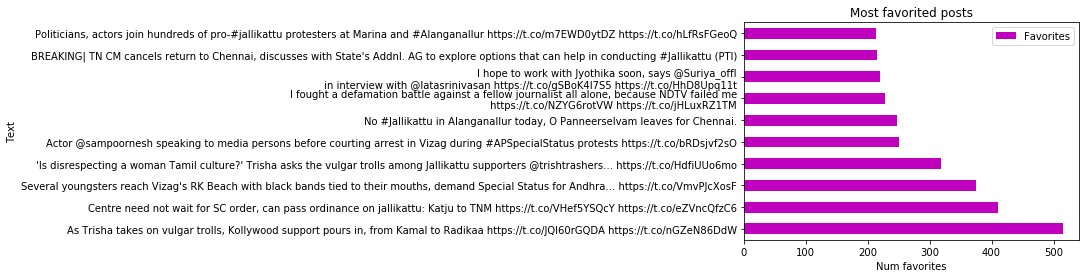

In [89]:
most_favorited.plot.barh(y="Favorites", x="Text", color='m')
plt.xlabel('Num favorites')
plt.title("Most favorited posts")

## Most Retweeted 

In [90]:
most_retweeted = twrd.sort_values(by='Retweets',ascending=False).head(10)

In [91]:
most_retweeted

,ID,Text,Created_at,Favorites,Retweets
2406,8.217015e+17,"Centre need not wait for SC order, can pass or...",2017-01-18 12:51:20,411,325
1332,8.244781e+17,Several youngsters reach Vizag's RK Beach with...,2017-01-26 04:44:26,375,306
1140,8.249907e+17,RT @thenewsminute: I fought a defamation battl...,2017-01-27 14:41:16,0,256
1430,8.242116e+17,I fought a defamation battle against a fellow ...,2017-01-25 11:05:29,228,256
346,8.270389e+17,RT @dhanyarajendran: The budget is done. UP el...,2017-02-02 06:20:17,0,235
1194,8.248657e+17,"RSS used me to target a Kerala church, create ...",2017-01-27 06:24:49,95,215
1690,8.235341e+17,Shocking videos from TN: Cops indulging in van...,2017-01-23 14:13:27,73,153
3001,8.199106e+17,Flying high: Meet three Indian women scientist...,2017-01-13 14:15:01,162,149
1953,8.230364e+17,"No #Jallikattu in Alanganallur today, O Pannee...",2017-01-22 05:15:45,248,144
2807,8.205865e+17,RT @unwomenindia: Flying high: Three Indian wo...,2017-01-15 11:00:36,0,143


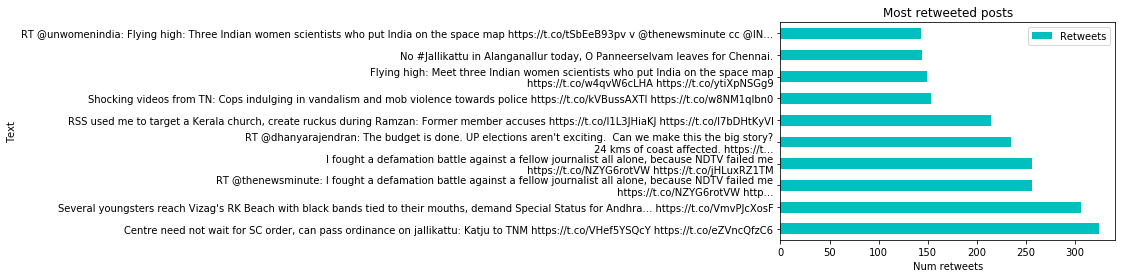

In [93]:
most_retweeted.plot.barh(y="Retweets", x="Text", color='c')
plt.xlabel('Num retweets')
plt.title("Most retweeted posts")

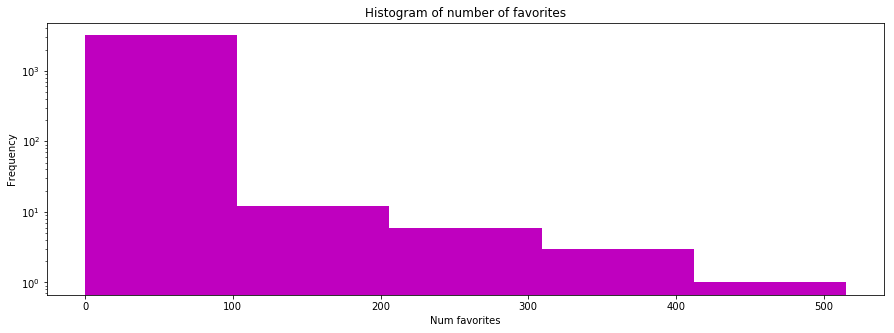

In [94]:
twrd.ix[:,'Favorites'].plot.hist(bins=5, figsize=(15,5), log=True, color='m')
plt.xlabel('Num favorites')
plt.title("Histogram of number of favorites")

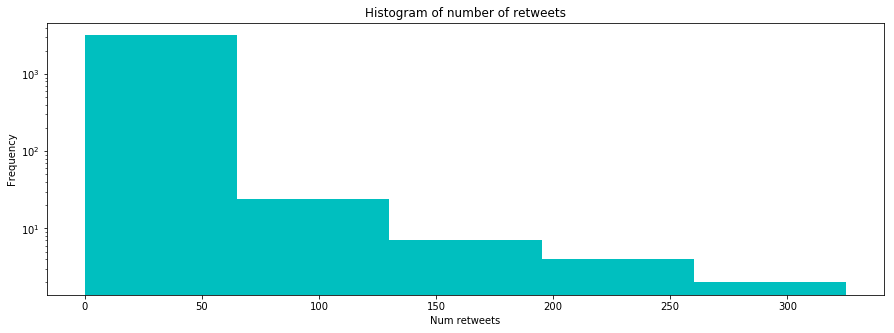

In [95]:
twrd.ix[:,'Retweets'].plot.hist(bins=5, figsize=(15,5), log=True, color='c')
plt.xlabel('Num retweets')
plt.title("Histogram of number of retweets")